In [165]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [166]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge,LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,cross_validate
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import recall_score,accuracy_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.metrics import log_loss
from sklearn.metrics import RocCurveDisplay
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest

In [167]:
df = pd.read_csv('Data/Loan_Default_New.csv', index_col=0)

In [168]:
df.shape

(532428, 44)

In [122]:
df['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532428 entries, 58189336 to 46122259
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    532428 non-null  int64  
 1   funded_amnt                  532428 non-null  int64  
 2   funded_amnt_inv              532428 non-null  float64
 3   term                         532428 non-null  object 
 4   batch_enrolled               447279 non-null  object 
 5   int_rate                     532428 non-null  float64
 6   grade                        532428 non-null  object 
 7   sub_grade                    532428 non-null  object 
 8   emp_title                    501595 non-null  object 
 9   emp_length                   505537 non-null  object 
 10  home_ownership               532428 non-null  object 
 11  annual_inc                   532425 non-null  float64
 12  verification_status          532428 non-null  obj

In [124]:
df.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal   

In [125]:
df = df.drop(['desc','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','verification_status_joint','last_week_pay'],axis=1)

In [126]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
batch_enrolled                85149
int_rate                          0
grade                             0
sub_grade                         0
emp_title                     30833
emp_length                    26891
home_ownership                    0
annual_inc                        3
verification_status               0
pymnt_plan                        0
purpose                           0
title                            90
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      16
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int               

In [127]:
df.dropna(subset=['batch_enrolled'],inplace=True)

In [128]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
batch_enrolled                    0
int_rate                          0
grade                             0
sub_grade                         0
emp_title                     25818
emp_length                    22533
home_ownership                    0
annual_inc                        2
verification_status               0
pymnt_plan                        0
purpose                           0
title                            76
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      15
inq_last_6mths                   15
open_acc                         15
pub_rec                          15
revol_bal                         0
revol_util                      248
total_acc                        15
initial_list_status               0
total_rec_int               

In [129]:
df.dropna(inplace=True)

In [130]:
df.shape

(387849, 38)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387849 entries, 58189336 to 46122259
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   387849 non-null  int64  
 1   funded_amnt                 387849 non-null  int64  
 2   funded_amnt_inv             387849 non-null  float64
 3   term                        387849 non-null  object 
 4   batch_enrolled              387849 non-null  object 
 5   int_rate                    387849 non-null  float64
 6   grade                       387849 non-null  object 
 7   sub_grade                   387849 non-null  object 
 8   emp_title                   387849 non-null  object 
 9   emp_length                  387849 non-null  object 
 10  home_ownership              387849 non-null  object 
 11  annual_inc                  387849 non-null  float64
 12  verification_status         387849 non-null  object 
 13  pymnt

In [132]:
#numcols = ['loan_amnt','funded_amnt','int_rate', 'annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
numcols = ['loan_amnt','funded_amnt','int_rate', 'annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc']

In [133]:
catcols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status', 'pymnt_plan','purpose','addr_state','initial_list_status','application_type']

In [134]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis =1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =42,test_size = 0.25)

In [135]:
subpipe_numerics =Pipeline(steps =[
    ('ss',StandardScaler())      
])
    
subpipe_cat =Pipeline([
    ('ohe',OneHotEncoder(sparse=False, handle_unknown='ignore')) 
])

In [136]:
CT = ColumnTransformer(transformers=[
    ('subpipe_num', subpipe_numerics,numcols),
    ('subpipe_cate', subpipe_cat,catcols)  
],remainder='drop')

In [137]:
subpipe_numerics1 =Pipeline(steps =[
    ('polynomial',PolynomialFeatures()),
    ('ss',StandardScaler())
])
    
subpipe_cat1 =Pipeline([
    ('ohe',OneHotEncoder(sparse=False, handle_unknown='ignore')) 
])

In [138]:
CT_poly = ColumnTransformer(transformers=[
    ('subpipe_num', subpipe_numerics1,numcols),
    ('subpipe_cate', subpipe_cat1,catcols)
],remainder='drop')

In [139]:
CT_poly

ColumnTransformer(transformers=[('subpipe_num',
                                 Pipeline(steps=[('polynomial',
                                                  PolynomialFeatures()),
                                                 ('ss', StandardScaler())]),
                                 ['loan_amnt', 'funded_amnt', 'int_rate',
                                  'annual_inc', 'dti', 'open_acc', 'pub_rec',
                                  'revol_bal', 'revol_util', 'total_acc']),
                                ('subpipe_cate',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['term', 'grade', 'sub_grade', 'emp_length',
                                  'home_ownership', 'verification_status',
                                  'pymnt_plan', 'purpose', 'addr_state',
                                  'initial_list_status', 'application_type'])])

In [140]:
def model_eval(estimator,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,CT=CT):
    warnings.filterwarnings('ignore')
    model_name = type(estimator).__name__
    model = Pipeline(steps=[
    ('ct',CT),
    ('model',estimator)])

    model.fit(X_train,y_train)
    
    print(f'below are the model evaluation statistics of {model}')
    print(f' train_score : {round(model.score(X_train,y_train),4)}')
    print(f' test_score : {round(model.score(X_test,y_test),4)}')
    print(f' log loss on training dataset : {round(log_loss(y_train, model.predict_proba(X_train)),4)}')
    print(f' log loss on test dataset : {round(log_loss(y_test, model.predict_proba(X_test)),4)}')
    print(f'CrossValidation on training dataset : {cross_val_score(model,X_train,y_train,scoring="f1").mean()}')
    
    print('classification_report')
    print(classification_report(y_test, model.predict(X_test)))
    
    cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    cm.ax_.set_title('Conf Matrix on Test Data')
    
    RocCurveDisplay.from_estimator(model, X_test, y_test)

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

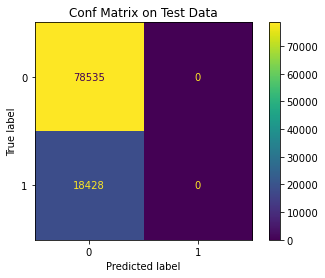

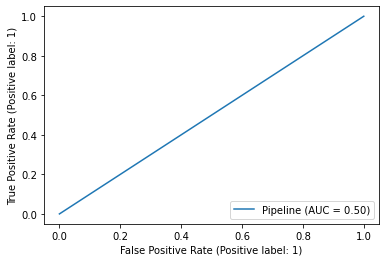

In [111]:
model_eval(DummyClassifier())

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

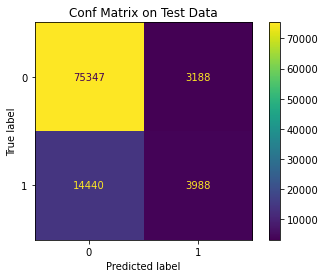

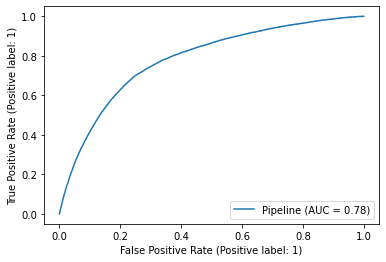

In [112]:
model_eval(LogisticRegression())

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('polynomial',
                                                                   PolynomialFeatures()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
              

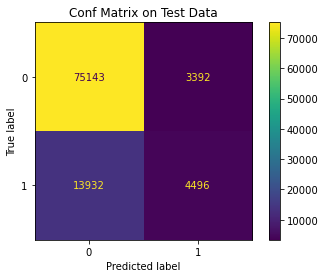

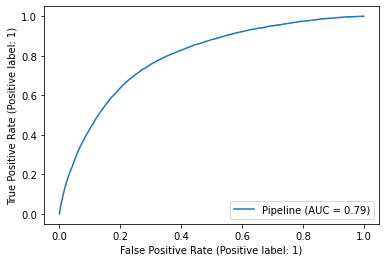

In [113]:
model_eval(LogisticRegression(),CT=CT_poly)

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

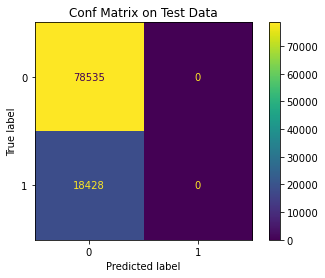

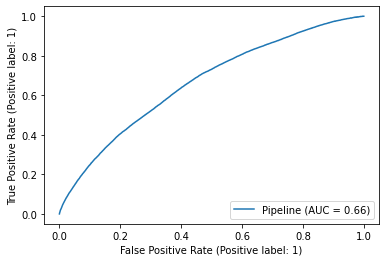

In [115]:
model_eval(RandomForestClassifier(max_depth=4))

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

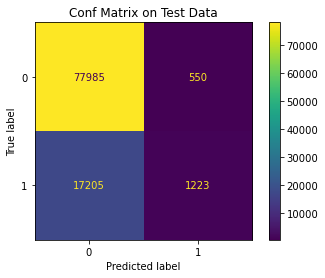

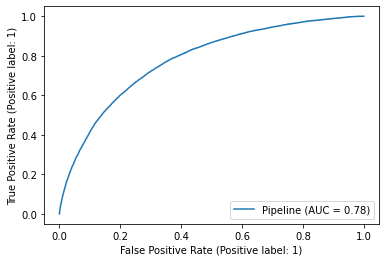

In [116]:
model_eval(GradientBoostingClassifier())

In [95]:
model = Pipeline(steps=[
    ('ct',CT),
    ('feature_selection', SelectKBest(k=5)),
    ('model',RandomForestClassifier(max_depth=6))])

model.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'total_rec_int',
                                                   'total_rec_late_fee',
                                                   'recoveries',
                                                   'collection_recovery_fee',
                                                   'collections_12_m...
                                                   'total_rev_hi_lim']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['term', 'grade', 'sub_grade',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'addr_state',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('feature_selection', SelectKBest(k=5)),
                ('model', RandomForestClassifier(max_depth=6))])

In [96]:
model.score(X_train,y_train)

0.809368618634104

In [97]:
X_train.shape

(290886, 37)

In [98]:
feature_importance = model.named_steps['model'].feature_importances_
selected_feature_indices = model.named_steps['feature_selection'].get_support(indices=True)
feature_names = [X_train.columns[i] for i in selected_feature_indices]
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance}")
    

    
# Extract feature importance
feature_importance = pipeline.named_steps['model'].feature_importances_

# Get the selected feature indices
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Get the corresponding feature names
feature_names = [X_train.columns[i] for i in selected_feature_indices]

# Print feature importance and corresponding feature names
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance}")

IndexError: index 150 is out of bounds for axis 0 with size 37

In [101]:
pipeline = Pipeline([
    ('ct',CT),
    ('feature_selection', SelectKBest()),
    ('model', RandomForestClassifier())

])

# Fit the pipeline on your data
pipeline.fit(X_train, y_train)

# Extract feature importance
feature_importance = pipeline.named_steps['model'].feature_importances_

# Get the selected feature indices
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Get the corresponding feature names
feature_names = [X_train.columns[i] for i in selected_feature_indices]

# Print feature importance and corresponding feature names
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance}")

IndexError: index 83 is out of bounds for axis 0 with size 37

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

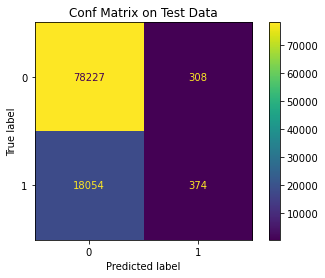

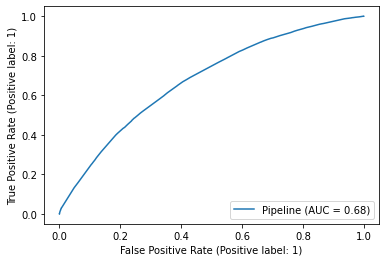

In [147]:
model_eval(DecisionTreeClassifier(max_depth=7,max_features=70))

In [49]:
model = Pipeline(steps=[
    ('ct',CT),
    ('model',DecisionTreeClassifier())])

model.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amount',
                                                   'rate_of_interest',
                                                   'Interest_rate_spread',
                                                   'Upfront_charges', 'term',
                                                   'property_value', 'income',
                                                   'Credit_Score', 'LTV',
                                                   'Upfront_charges%',
                                                   'monthly_premium', 'PTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unkno...
                                                   'approv_in_adv', 'loan_type',
                                                   'loan_purpose',
                                                   'Credit_Worthiness',
                                                   'open_credit',
                                                   'business_or_commercial',
                                                   'Neg_ammortization',
                                                   'interest_only',
                                                   'lump_sum_payment',
                                                   'construction_type',
                                                   'occupancy_type',
                                                   'Secured_by', 'total_units',
                                                   'credit_type',
                                                   'co-applicant_credit_type',
                                                   'age',
                                                   'submission_of_application',
                                                   'Region',
                                                   'Security_Type'])])),
                ('model', DecisionTreeClassifier())])

In [65]:
model.name

AttributeError: 'Pipeline' object has no attribute 'name'

In [52]:
model.score(X_test,y_test)

0.8641580878002604

In [60]:
feature_used = list(df_train.columns.values)

In [64]:
model_tree = model.named_steps['model']
feature_names = model.named_steps['ct'].get_feature_names_out(input_features=feature_used)

f, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model_tree, feature_names=feature_names, ax=ax)

AttributeError: 'ColumnTransformer' object has no attribute 'get_feature_names'

In [66]:
feature_used

['Unnamed: 0.1',
 'ID',
 'loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'property_value',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'income',
 'credit_type',
 'Credit_Score',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'LTV',
 'Region',
 'Security_Type',
 'Status',
 'Upfront_charges%',
 'monthly_premium',
 'PTI']

In [117]:
model_eval(GradientBoostingClassifier())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-117-b7b055310bc7>", line 1, in <module>
    model_eval(GradientBoostingClassifier())
  File "<ipython-input-110-16325b0a1f21>", line 8, in model_eval
    model.fit(X_train,y_train)
  File "C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_gb.py", line 538, in fit
    n_stages = self._fit_stages(
  File "C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_gb.py", line 615, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_gb.py", line 257, in _fit_stage
    tree.fi

TypeError: object of type 'NoneType' has no len()

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

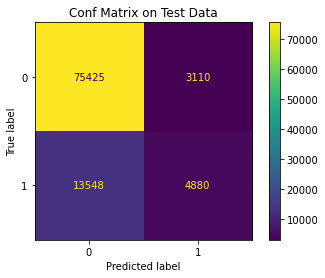

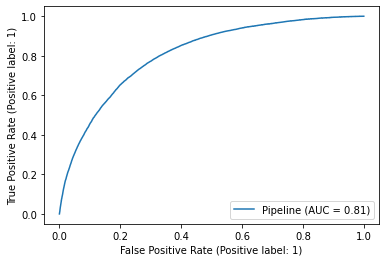

In [141]:
model_eval(XGBClassifier())

In [156]:
fsm_model_pipe1= ImPipeline(steps=[
        ('ct',CT),
        ('smote',SMOTE(random_state=42)),
        ('fsm',DecisionTreeClassifier(max_depth=7))
    ])

In [157]:
fsm_model_pipe1.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['term', 'grade', 'sub_grade',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'addr_state',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('fsm', DecisionTreeClassifier(max_depth=7))])

In [158]:
log_train_score = round(fsm_model_pipe1.score(X_train,y_train),4)
log_train_score

0.6811

In [159]:
log_test_score = round(fsm_model_pipe1.score(X_test,y_test),4)
log_test_score

0.6796

In [160]:
log_log_loss_train = round(log_loss(y_train, fsm_model_pipe1.predict_proba(X_train)),4)
log_log_loss_test = round(log_loss(y_test, fsm_model_pipe1.predict_proba(X_test)),4)

print(f"""
Our fsm model's logloss on the train set is {log_log_loss_train}. \n
Our fsm model's logloss on the test set is {log_log_loss_test}

""")


Our fsm model's logloss on the train set is 0.586. 

Our fsm model's logloss on the test set is 0.5863




In [141]:
log_cv = cross_val_score(fsm_model_pipe1, X_train, y_train,scoring = "f1")
log_cv= round(log_cv.mean(),4)
log_cv

0.9781

In [161]:
y_hat = fsm_model_pipe1.predict(X_test)
log_accuracy = round(accuracy_score(y_test, y_hat), 2)
log_recall = round(recall_score(y_test, y_hat), 2)
log_precision = round(precision_score(y_test, y_hat), 2)
log_f1 = round(f1_score(y_test, y_hat), 2)

print(f"""
Our fsm model's accuracy on the test set is {log_accuracy}. \n
Our fsm model's recall on the test set is {log_recall} \n
Our fsm model's precision on the test set is {log_precision} \n
Our fsm model's f1-score on the test is {log_f1}.
""")


Our fsm model's accuracy on the test set is 0.68. 

Our fsm model's recall on the test set is 0.49 

Our fsm model's precision on the test set is 0.29 

Our fsm model's f1-score on the test is 0.37.



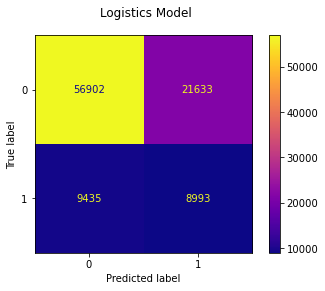

In [162]:
fig, ax = plt.subplots()

fig.suptitle("Logistics Model")

ConfusionMatrixDisplay.from_estimator(fsm_model_pipe1, X_test, y_test, ax=ax, cmap="plasma");

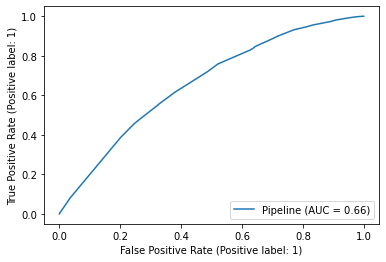

In [163]:
RocCurveDisplay.from_estimator(fsm_model_pipe1, X_train, y_train);